# Лабораторна робота №2

#### Тема: Аналіз багатовимірного часового ряду

#### Виконали студенти груп КА-21 та КА-24 Акименко Валерія, Герман Вікторія, Жигалов Олександр, Людоговська Анна.

### _Імпортування бібліотек_

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### _Завдання 1_

Посилання на часовий ряд: https://www.kaggle.com/datasets/rohitgrewal/weather-data

In [21]:
df_original = pd.read_csv('dataset/Project 1 - Weather Dataset.csv')
df_original

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


Спостереження ведеться кожну годину з 01.01.2012 до 31.12.2012

Кількість записів: 8774

Кількість атрибутів: 8

Кількісні атрибути: Temp_C; Dew Point Temp_C; Rel Hum_%; Wind Speed_km/h; Visibility_km; Press_kPa

Якісні атрибути: Date/Time; Weather

### _Завдання 2_

Часовий ряд містить в собі різні показники температури. Первинний аналіз буде проведено для прикладу на Temp_C та Wind Speed_km/h

Температура

In [32]:
print(f'Мінімальна температура: {int(df_original['Temp_C'].min())}\n'
      f'Максимальна температура: {int(df_original['Temp_C'].max())}\n'
      f'Середня температура: {int(df_original['Temp_C'].mean())}\n'
      f'Медіана температури: {int(df_original['Temp_C'].median())}')

Мінімальна температура: -23
Максимальна температура: 33
Середня температура: 8
Медіана температури: 9


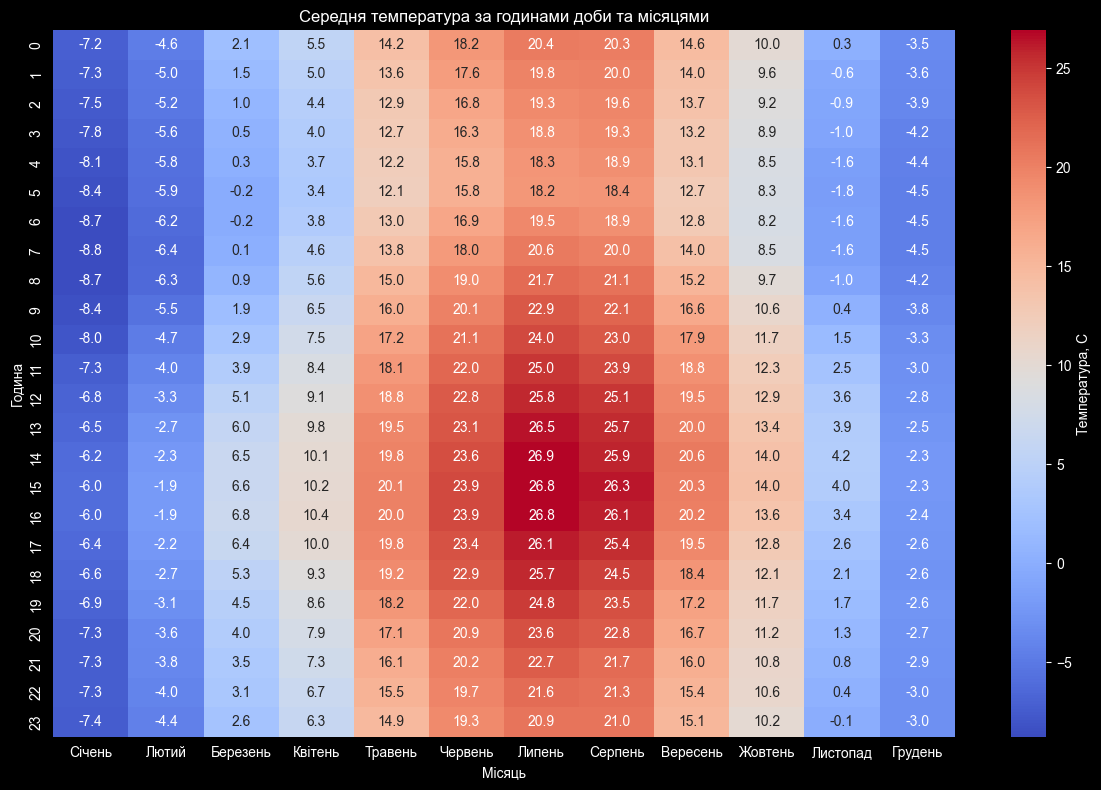

In [27]:
df_original['Date/Time'] = pd.to_datetime(df_original['Date/Time'])
df_original['Month'] = df_original['Date/Time'].dt.month
df_original['Hour'] = df_original['Date/Time'].dt.hour

temp_pivot = df_original.pivot_table(values='Temp_C', index='Hour', columns='Month', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(temp_pivot,
            cmap='coolwarm',
            annot=True,
            fmt=".1f",
            cbar_kws={'label': 'Температура, С'})

plt.title('Середня температура за годинами доби та місяцями')
plt.xlabel('Місяць')
plt.ylabel('Година')


plt.xticks(ticks=[x + 0.5 for x in range(12)],
           labels=['Січень', 'Лютий', 'Березень', 'Квітень', 'Травень', 'Червень', 'Липень', 'Серпень', 'Вересень', 'Жовтень', 'Листопад', 'Грудень'])

plt.tight_layout()